In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam

In [21]:
iris = load_iris() # dict 형식으로 된 자료 
print(type(iris))
print('Data :', iris.data.shape)
print('Label :', iris.target.shape)
print('feature name :', iris.feature_names)
print('target :', iris.target_names)
print('iris dataset keys\n', iris.keys())

<class 'sklearn.utils.Bunch'>
Data : (150, 4)
Label : (150,)
feature name : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target : ['setosa' 'versicolor' 'virginica']
iris dataset keys
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [22]:
x = iris.data
y = iris.target

In [23]:
# class 가 2개라고 2진 분류기가 아니다. ex) 개 or 고양이 사진 분류는 2진 분류기가 아니라 다중분류기

In [24]:
encoder = OneHotEncoder(sparse = False) #sparse = False 원래 값이 출력된다
y = y.reshape(-1,1) # 1개씩 묶을 수 있는대로 묶어라
encoded_y = encoder.fit_transform(y)
print(encoded_y.shape)
print(encoded_y[50:55])

(150, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, encoded_y, test_size= 0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [38]:
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu'))   #feature name 4개였지 data shape도 그렇고
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))   #3개의 값을 확률값으로 바꿔줌. 즉 출력의 3가지 경우의 확률 합하면 1이됨.

In [39]:
opt = Adam(lr = 0.1) # learning rate를 설정해 주는 것(step 사이즈 제한) adam은 알아서 값을 잡는다, 그래도 값을 주고 싶으면 지정 가능
model.compile(opt, loss = 'categorical_crossentropy', # 다중일 때는 categorical_crossentropy
              metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               1280      
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 512)               66048     
                                                                 
 dense_15 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 101,763
Trainable params: 101,763
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [40]:
fit_hist = model.fit(X_train, Y_train, batch_size = 5,
                     epochs = 20, verbose = 1)

Epoch 1/20
24/24 [==============================] - 0s 3ms/step - loss: 22.9189 - accuracy: 0.4083
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7500
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8167
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.6833
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7417
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8083
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.9167
Epoch 8/20
24/24 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.7083
Epoch 9/20
24/24 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.6833
Epoch 10/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3173 - accuracy: 0.8417
Epoch 11/20
24/24 

In [41]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('Final test set accuracy',score[1])

Final test set accuracy 0.6333333253860474


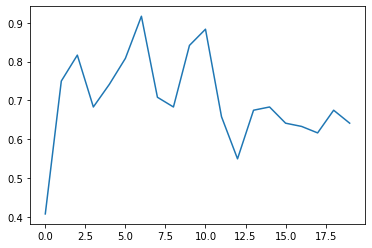

In [42]:
plt.plot(fit_hist.history['accuracy'])
plt.show()

In [43]:
my_sample = np.random.randint(30) # 0~ 29 까지 같은 확률로
sample = X_test[my_sample] #X_test에서 random 하게 하나 뽑은 것
print(sample)

[6.2 2.9 4.3 1.3]


In [45]:
sample = sample.reshape(-1, 4) # 4개의 자료를 한 번 더 묶어서 
print(sample)

[[6.2 2.9 4.3 1.3]]


In [48]:
pred  = model.predict(sample)
print('pred is :',pred) # 확률 값 3개를 합치면 1, ex) 0.51391697 의 확률로 중간의 것
print('actual is :', Y_test[my_sample])
print('Target :', iris.target_names[np.argmax(Y_test[my_sample])]) # argmax=> Y_test[my_sample]안의 값 중 가장 큰 값 return
print('Prediction after learning is :', iris.target_names[np.argmax(pred)]) # pred 의 가장 큰 값 return

pred is : [[0.00248376 0.51391697 0.48359922]]
actual is : [0. 1. 0.]
Target : versicolor
Prediction after learning is : versicolor
